In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
%matplotlib inline
np.set_printoptions(precision=3)
pd.set_option("display.precision", 3)
from matplotlib.pyplot import figure
figure(figsize=(8, 6), dpi=80)

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [56]:
data = pd.read_csv("data.csv", index_col=0, parse_dates = True)
data

,assets,liabilities,equity,ebit,profit,retained_earnings,revenue,working_capital,rate,DER,DAR,EM
year,,,,,,,,,,,,
2006-01-01,37.25,30.02,7.23,0.22,0.21,0.723,2.44,3.109,7.50,4.152,0.806,5.152
2007-01-01,73.77,60.63,13.14,0.53,0.55,1.314,5.89,5.650,12.43,4.614,0.822,5.614
2008-01-01,116.64,99.21,17.43,1.91,1.46,1.743,21.22,7.495,16.55,5.692,0.851,6.692
2009-01-01,219.98,200.02,19.96,3.18,2.53,1.996,35.33,8.583,20.79,10.021,0.909,11.021
2010-01-01,393.49,353.13,40.36,6.83,4.75,4.036,75.89,17.355,14.78,8.750,0.897,9.750
2011-01-01,565.92,515.10,50.82,14.43,10.46,5.082,160.33,21.853,12.50,10.136,0.910,11.136
2012-01-01,898.13,804.23,93.90,21.64,16.48,9.390,240.44,40.377,14.46,8.565,0.895,9.565
2013-01-01,1298.97,1148.27,150.70,31.64,26.02,15.070,351.56,64.801,15.67,7.620,0.884,8.620
2014-01-01,2147.00,1924.20,222.80,41.29,33.15,22.280,411.10,94.286,18.67,8.636,0.896,9.636


In [57]:
def calcAltmanZ(assets, equity, liabilities, workingCapital, retainedEarnings, revenue, ebit):
    A = workingCapital / assets
    B = retainedEarnings / assets
    C = ebit / assets
    D = equity / liabilities
    E = revenue / assets
    
    Z = 1.2*A + 1.4*B + 3.3*C + 0.6*D + 1.0*E
    
    return Z 

def classifyScore(Z):
    if Z >= 8.15:
        return 'AAA'
    elif Z >= 7.6 and Z < 8.15:
        return 'AA+'
    elif Z >= 7.3 and Z < 7.6:
        return 'AA'
    elif Z >= 7 and Z < 7.3:
        return 'AA-'
    elif Z >= 6.85 and Z < 7:
        return 'A+'
    elif Z >= 6.65 and Z < 6.85:
        return 'A+'
    elif Z >= 6.4 and Z < 6.65:
        return 'A-'
    elif Z >= 6.25 and Z < 6.4:
        return 'BBB+'
    elif Z >= 5.85 and Z < 6.25:
        return 'BBB'
    elif Z >= 5.65 and Z < 5.85:
        return 'BBB-'
    elif Z >= 5.25 and Z < 5.65:
        return 'BB+'
    elif Z >= 4.95 and Z < 5.25:
        return 'BB'
    elif Z >= 4.75 and Z < 4.95:
        return 'BB-'
    elif Z >= 4.4 and Z < 4.75:
        return 'B+'
    elif Z >= 4.15 and Z < 4.4:
        return 'B'
    elif Z >= 3.75 and Z < 4.15:
        return 'B-'
    elif Z >= 3.2 and Z < 3.75:
        return 'CCC+'
    elif Z >= 2.5 and Z < 3.2:
        return 'CCC'
    elif Z >= 1.75 and Z < 2.5:
        return 'CCC-'
    else:
        return 'D'
    

In [58]:
def calcMerton(Ao, L, sigmaA, r, T):
    d1 = (np.log(Ao / L) + (r + 0.5 * pow(sigmaA, 2)) * T) / (sigmaA * np.sqrt(T))
    d2 = d1 - sigmaA * np.sqrt(T)
    E = Ao * st.norm.cdf(d1) - L * np.exp(-r * T) * st.norm.cdf(d2)

    return E, d1, d2

In [59]:
roa = []
probs = { 'merton1': [], 'merton3': [], 'merton5': [], 'altman': [], 'naive': [] } 

for index, row in data.iterrows():
    roa.append(row.profit / row.assets)
    naiveZ = (np.mean(roa) + row.equity / row.assets) / (np.std(roa) + 0.000001)
    probs['naive'].append(st.norm.cdf(-naiveZ) * 100)
    
    altmanZ = calcAltmanZ(row.assets, row.equity, row.liabilities, row.working_capital, row.retained_earnings, row.revenue, row.ebit)
    probs['altman'].append(st.norm.cdf(-altmanZ) * 100)
    
    E, d1, d2 = calcMerton(row.assets, row.liabilities, 0.20, row.rate / 100, 1)
    probs['merton1'].append(st.norm.cdf(-d2) * 100)
   
    E, d1, d2 = calcMerton(row.assets, row.liabilities, 0.20, row.rate / 100, 3)
    probs['merton3'].append(st.norm.cdf(-d2) * 100)
    
    E, d1, d2 = calcMerton(row.assets, row.liabilities, 0.20, row.rate / 100, 5)
    probs['merton5'].append(st.norm.cdf(-d2) * 100)

In [60]:
probs_df = pd.DataFrame(probs)
probs_df.index = pd.RangeIndex(start=2006, stop=2019, step=1)
probs_df

,merton1,merton3,merton5,altman,naive
2006,8.788,13.583,13.623,36.061,0.000e+00
2007,6.651,7.084,5.428,36.301,0.000e+00
2008,6.218,4.206,2.337,33.018,0.000e+00
2009,7.852,2.860,1.035,37.157,6.357e-272
2010,11.898,7.792,4.738,34.975,0.000e+00
2011,15.976,11.881,8.313,31.364,7.815e-133
2012,11.997,8.108,5.050,31.353,3.699e-145
2013,9.679,6.180,3.561,30.647,1.103e-148
2014,8.359,3.921,1.748,34.766,9.116e-135
2015,7.232,1.996,0.569,36.506,3.084e-87


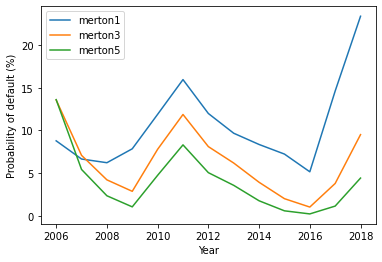

In [61]:
plt.plot(probs_df.index, probs_df['merton1'], label = 'merton1')
plt.plot(probs_df.index, probs_df['merton3'], label = 'merton3')
plt.plot(probs_df.index, probs_df['merton5'], label = 'merton5')
plt.ylabel("Probability of default (%)")
plt.xlabel("Year")
plt.legend(loc="best")
plt.show()

In [62]:
volatilities = np.arange(0.10, 1, 0.10)
for index, row in data.iterrows():
    for v in volatilities:
        E, d1, d2 = calcMerton(row.assets, row.liabilities, v, row.rate / 100, 1)
        prob = st.norm.cdf(-d2)
        print('{:.4f}'.format(prob), end='\t', flush=True)
    print()

0.0021	0.0879	0.2063	0.2991	0.3701	0.4268	0.4739	0.5146	0.5505	
0.0008	0.0665	0.1793	0.2739	0.3479	0.4075	0.4571	0.4998	0.5374	
0.0006	0.0622	0.1733	0.2682	0.3428	0.4030	0.4532	0.4963	0.5344	
0.0014	0.0785	0.1949	0.2886	0.3609	0.4188	0.4670	0.5085	0.5451	
0.0060	0.1190	0.2409	0.3300	0.3966	0.4496	0.4937	0.5319	0.5657	
0.0161	0.1598	0.2809	0.3640	0.4254	0.4740	0.5148	0.5502	0.5818	
0.0062	0.1200	0.2419	0.3308	0.3974	0.4502	0.4943	0.5324	0.5662	
0.0030	0.0968	0.2167	0.3085	0.3783	0.4338	0.4801	0.5199	0.5552	
0.0018	0.0836	0.2011	0.2944	0.3660	0.4232	0.4708	0.5118	0.5481	
0.0011	0.0723	0.1870	0.2812	0.3544	0.4131	0.4620	0.5041	0.5413	
0.0003	0.0515	0.1578	0.2530	0.3292	0.3910	0.4426	0.4870	0.5261	
0.0121	0.1463	0.2682	0.3534	0.4165	0.4665	0.5083	0.5446	0.5769	
0.0547	0.2341	0.3445	0.4158	0.4681	0.5099	0.5455	0.5768	0.6051	


In [63]:
volatilities = np.arange(0.10, 1, 0.10)
for index, row in data.iterrows():
    for v in volatilities:
        E, d1, d2 = calcMerton(row.assets, row.liabilities, v, row.rate / 100, 1)
        print(classifyScore(d2), end='\t', flush=True)
    print()

CCC	D	D	D	D	D	D	D	D	
CCC	D	D	D	D	D	D	D	D	
CCC+	D	D	D	D	D	D	D	D	
CCC	D	D	D	D	D	D	D	D	
CCC	D	D	D	D	D	D	D	D	
CCC-	D	D	D	D	D	D	D	D	
CCC	D	D	D	D	D	D	D	D	
CCC	D	D	D	D	D	D	D	D	
CCC	D	D	D	D	D	D	D	D	
CCC	D	D	D	D	D	D	D	D	
CCC+	D	D	D	D	D	D	D	D	
CCC-	D	D	D	D	D	D	D	D	
D	D	D	D	D	D	D	D	D	


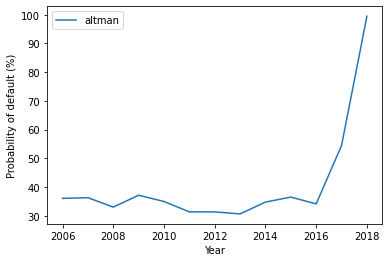

In [64]:
plt.plot(probs_df.index, probs_df['altman'], label = 'altman')
plt.ylabel("Probability of default (%)")
plt.xlabel("Year")
plt.legend(loc="best")
plt.show()

In [68]:
corr, _ = st.pearsonr(probs['altman'], probs['merton1'])
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.780


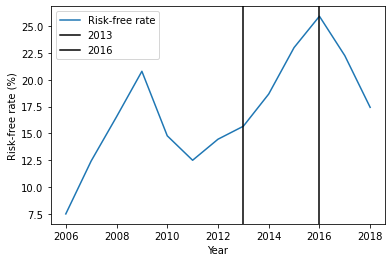

In [77]:
plt.plot(probs_df.index, data['rate'], label = 'Risk-free rate')
plt.axvline(2013, c="k", label="2013")
plt.axvline(2016, c="k", label="2016")
plt.legend(loc="best")
plt.ylabel("Risk-free rate (%)")
plt.xlabel("Year")
plt.show()

In [67]:
corr, _ = st.pearsonr(data['rate'], probs['merton1'])
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: -0.159


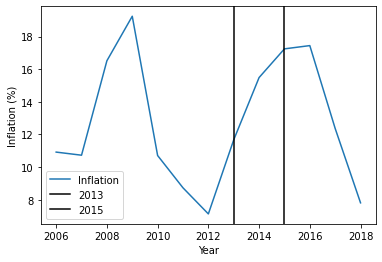

In [78]:
inflation = [10.92, 10.73, 16.52, 19.25, 10.71, 8.73, 7.13, 11.67, 15.49, 17.25, 17.45, 12.37, 7.81]
plt.plot(probs_df.index, inflation, label = 'Inflation')
plt.axvline(2013, c="k", label="2013")
plt.axvline(2015, c="k", label="2015")
plt.legend(loc="best")
plt.ylabel("Inflation (%)")
plt.xlabel("Year")
plt.show()

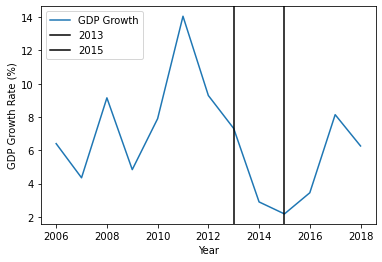

In [52]:
growth = [6.4, 4.35, 9.15, 4.84, 7.9, 14.05, 9.29, 7.31, 2.9, 2.18, 3.45, 8.14, 6.26]
plt.plot(probs_df.index, growth, label = 'GDP Growth')
plt.axvline(2013, c="k", label="2013")
plt.axvline(2015, c="k", label="2015")
plt.legend(loc="best")
plt.ylabel("GDP Growth Rate (%)")
plt.xlabel("Year")
plt.show()

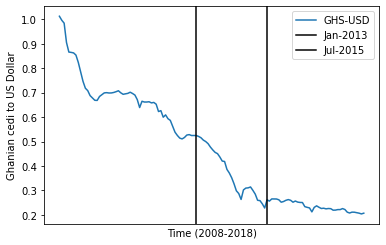

In [88]:
data_curr = pd.read_csv("GHS_USD.csv", index_col=0, parse_dates = True)
data_curr = data_curr.iloc[::-1]
plt.plot(data_curr['Price'], label = 'GHS-USD')
plt.axvline(58, c="k", label="Jan-2013")
plt.axvline(88, c="k", label="Jul-2015")

plt.legend(loc="best")
plt.ylabel("Ghanian cedi to US Dollar")
plt.xlabel("Time (2008-2018)")
plt.xticks([])
plt.show()

RangeIndex(start=2006, stop=2019, step=1)

In [45]:
data_curr.to_csv(r'C:\Users\dakov\Desktop\currency.csv')

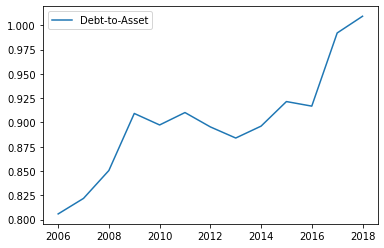

In [277]:
plt.plot(data['DAR'], label = 'Debt-to-Asset')
plt.legend(loc="best")
plt.show()

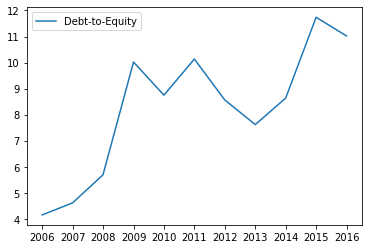

In [278]:
plt.plot(data['DER'][:11], label = 'Debt-to-Equity')
plt.legend(loc="best")
plt.show()

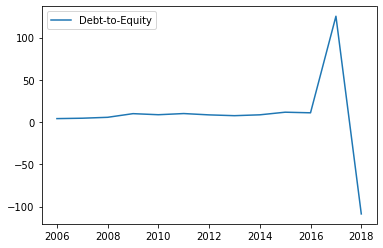

In [279]:
plt.plot(data['DER'][:13], label = 'Debt-to-Equity')
plt.legend(loc="best")
plt.show()

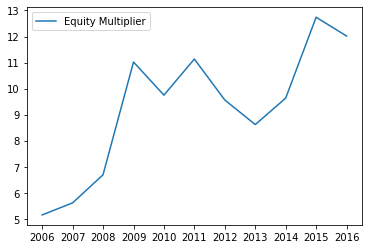

In [280]:
plt.plot(data['EM'][:11], label = 'Equity Multiplier')
plt.legend(loc="best")
plt.show()

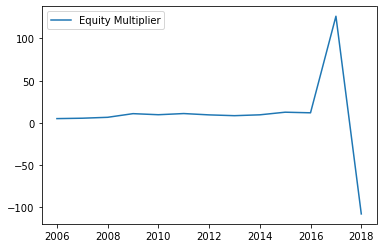

In [281]:
plt.plot(data['EM'][:13], label = 'Equity Multiplier')
plt.legend(loc="best")
plt.show()